### Required packages 

In [48]:
import pandas as pd
!pip install sweetviz
import sweetviz as sv
!pip install pandas_profiling



### Visualization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

### CSV files uploading

In [50]:
inpatient2015 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Deployment_Streamlit/inpatient_2015.csv')
outpatient2015 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Deployment_Streamlit/outpatient_2015.csv')
hospital_info = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Deployment_Streamlit/hospital_info.csv')

In [51]:
print('inpatientlength: ',len(inpatient2015))
print('outpatientlength: ',len(outpatient2015))
print('hospital_infolength: ',len(hospital_info))

inpatientlength:  201876
outpatientlength:  32532
hospital_infolength:  5314


In [52]:
hospital_info

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,310119,THE UNIVERSITY HOSPITAL,150 BERGEN ST,NEWARK,NJ,7101,ESSEX,(973) 972-5658,Acute Care Hospitals,Government - State,True,True,1,23.0,Same as the national average,NaN,Below the national average,23.0,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Not Available,5.0,POINT (-74.19213 40.74095)
1,310016,CAREPOINT HEALTH-CHRIST HOSPITAL,176 PALISADE AVE,JERSEY CITY,NJ,7306,HUDSON,(201) 795-8200,Acute Care Hospitals,Voluntary non-profit - Church,True,True,1,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,POINT (-74.05014200000001 40.734876)
2,390123,POTTSTOWN HOSPITAL,1600 EAST HIGH STREET,POTTSTOWN,PA,19464,MONTGOMERY,(610) 327-7000,Acute Care Hospitals,Voluntary non-profit - Private,True,True,1,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,POINT (-75.611502 40.243941)
3,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,MADISON,(731) 541-5000,Acute Care Hospitals,Government - Hospital District or Authority,True,True,1,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,POINT (-88.831973 35.63954)
4,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,NY,10451,BRONX,(718) 579-5000,Acute Care Hospitals,Government - Local,True,True,1,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Not Available,5.0,POINT (-73.924072 40.817681)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,49001F,Fort Belvoir Community Hospital,9300 DeWitt Loop,Fort Belvoir,VA,22060,FAIRFAX,(571) 231-3224,Acute Care - Department of Defense,Department of Defense,True,NaN,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,POINT (-77.142608 38.705877)
5310,26002F,General Leonard Wood ACH (FT Leonard Wood),126 Missouri Avenue,Fort Leonard Wood,MO,65473,PULASKI,(573) 596-0035,Acute Care - Department of Defense,Department of Defense,True,NaN,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,POINT (-92.116491 37.766471)
5311,50014F,NH Oak Harbor,3475 North Saratoga Street,Oak Harbor,WA,98277,ISLAND,(360) 257-9500,Acute Care - Department of Defense,Department of Defense,False,NaN,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,No

### Data cleaning packages

In [53]:
!pip install pyjanitor

In [54]:
from janitor import clean_names, remove_empty

In [55]:
hospital_info = pd.DataFrame.from_dict(hospital_info)

In [56]:
display(hospital_info)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,310119,THE UNIVERSITY HOSPITAL,150 BERGEN ST,NEWARK,NJ,7101,ESSEX,(973) 972-5658,Acute Care Hospitals,Government - State,True,True,1,23.0,Same as the national average,NaN,Below the national average,23.0,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Not Available,5.0,POINT (-74.19213 40.74095)
1,310016,CAREPOINT HEALTH-CHRIST HOSPITAL,176 PALISADE AVE,JERSEY CITY,NJ,7306,HUDSON,(201) 795-8200,Acute Care Hospitals,Voluntary non-profit - Church,True,True,1,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,POINT (-74.05014200000001 40.734876)
2,390123,POTTSTOWN HOSPITAL,1600 EAST HIGH STREET,POTTSTOWN,PA,19464,MONTGOMERY,(610) 327-7000,Acute Care Hospitals,Voluntary non-profit - Private,True,True,1,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,POINT (-75.611502 40.243941)
3,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,MADISON,(731) 541-5000,Acute Care Hospitals,Government - Hospital District or Authority,True,True,1,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,POINT (-88.831973 35.63954)
4,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,NY,10451,BRONX,(718) 579-5000,Acute Care Hospitals,Government - Local,True,True,1,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Not Available,5.0,POINT (-73.924072 40.817681)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,49001F,Fort Belvoir Community Hospital,9300 DeWitt Loop,Fort Belvoir,VA,22060,FAIRFAX,(571) 231-3224,Acute Care - Department of Defense,Department of Defense,True,NaN,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,POINT (-77.142608 38.705877)
5310,26002F,General Leonard Wood ACH (FT Leonard Wood),126 Missouri Avenue,Fort Leonard Wood,MO,65473,PULASKI,(573) 596-0035,Acute Care - Department of Defense,Department of Defense,True,NaN,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,POINT (-92.116491 37.766471)
5311,50014F,NH Oak Harbor,3475 North Saratoga Street,Oak Harbor,WA,98277,ISLAND,(360) 257-9500,Acute Care - Department of Defense,Department of Defense,False,NaN,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,Not Available,22.0,No

### Questions about hospitals

# Which three counties have the least number of hospitals? Where are they located?
## There are multiple counties with only one hospital, such as Jeff Davis county in Texas,Blackford county(Indiana)and Kearny county (New Jersey)

In [58]:
countyname = pd.value_counts(hospital_info['county_name'])
countyname = pd.DataFrame(countyname)
countyname = countyname.reset_index()

In [59]:
countyname.columns = ['county_name', 'state']

Text(0.5, 1.0, 'number of hospitals in different counties')

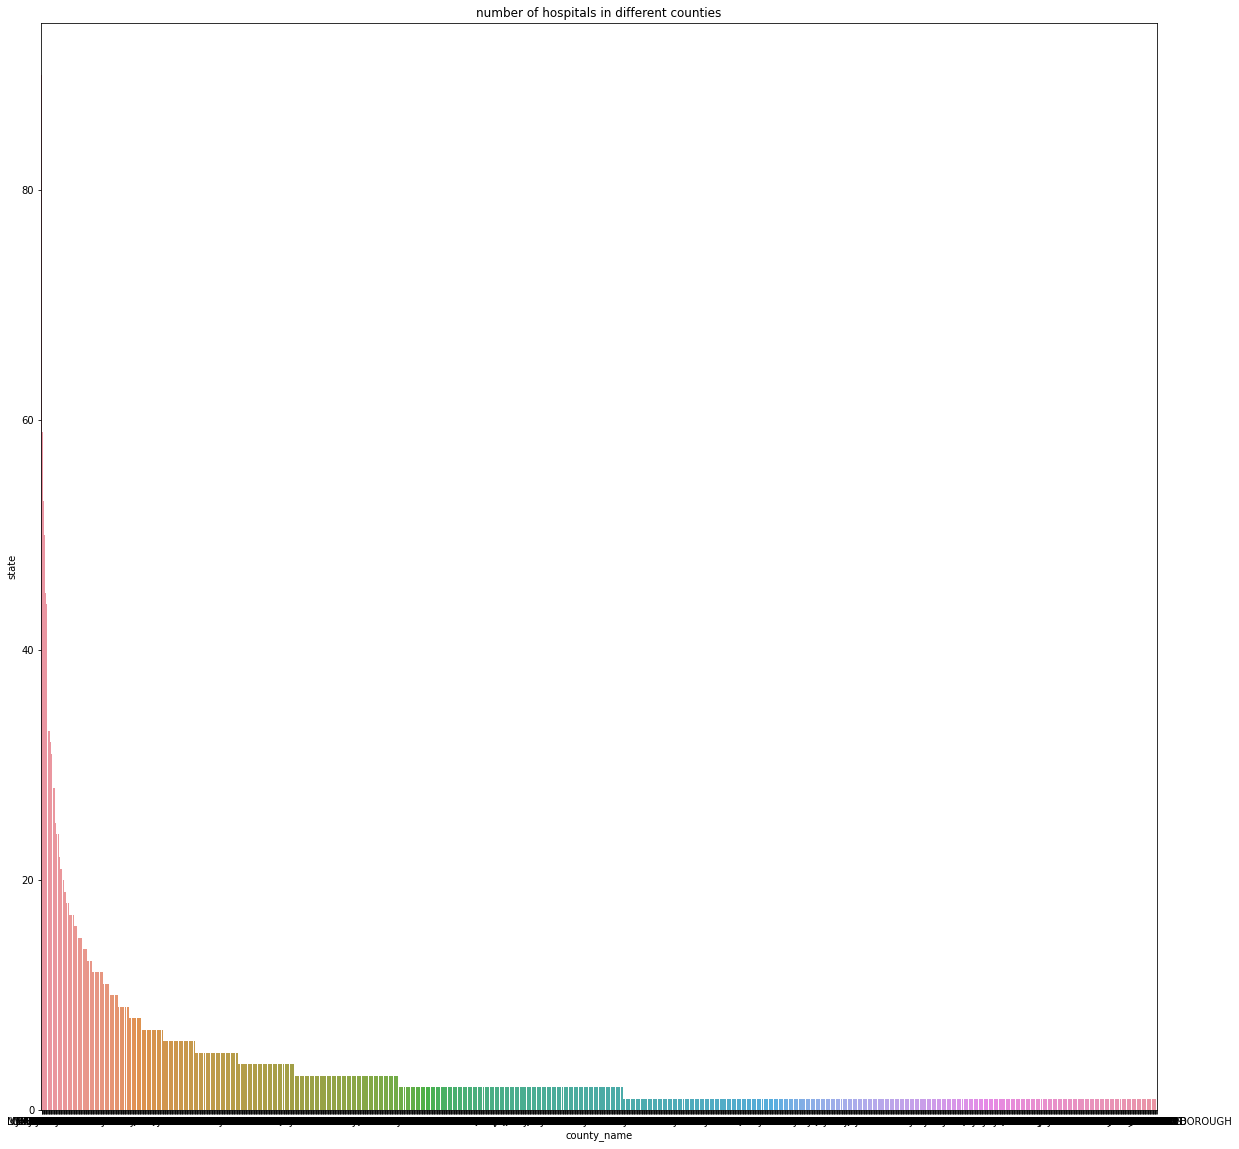

In [60]:
dims = (20,20)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'county_name', y= 'state', data = countyname)
ax.set(xlabel = 'county_name', ylabel = 'state')
ax.set_title('number of hospitals in different counties')

In [61]:
display(countyname)

,county_name,state
0,LOS ANGELES,90
1,COOK,59
2,JEFFERSON,56
3,MONTGOMERY,53
4,WASHINGTON,50
...,...,...
1563,DOOR,1
1564,GARRETT,1
1565,JEFF DAVIS,1
1566,BLACKFORD,1


## Which hospital type is the most common?
## Acute care hospitals

In [62]:
hospitaltype = pd.value_counts(hospital_info['hospital_type'])
hospitaltype = pd.DataFrame(hospitaltype)
hospitaltype = hospitaltype.reset_index()

In [63]:
hospitaltype.columns = ['hospital_type', 'state']

Text(0.5, 1.0, 'the most common hospital type')

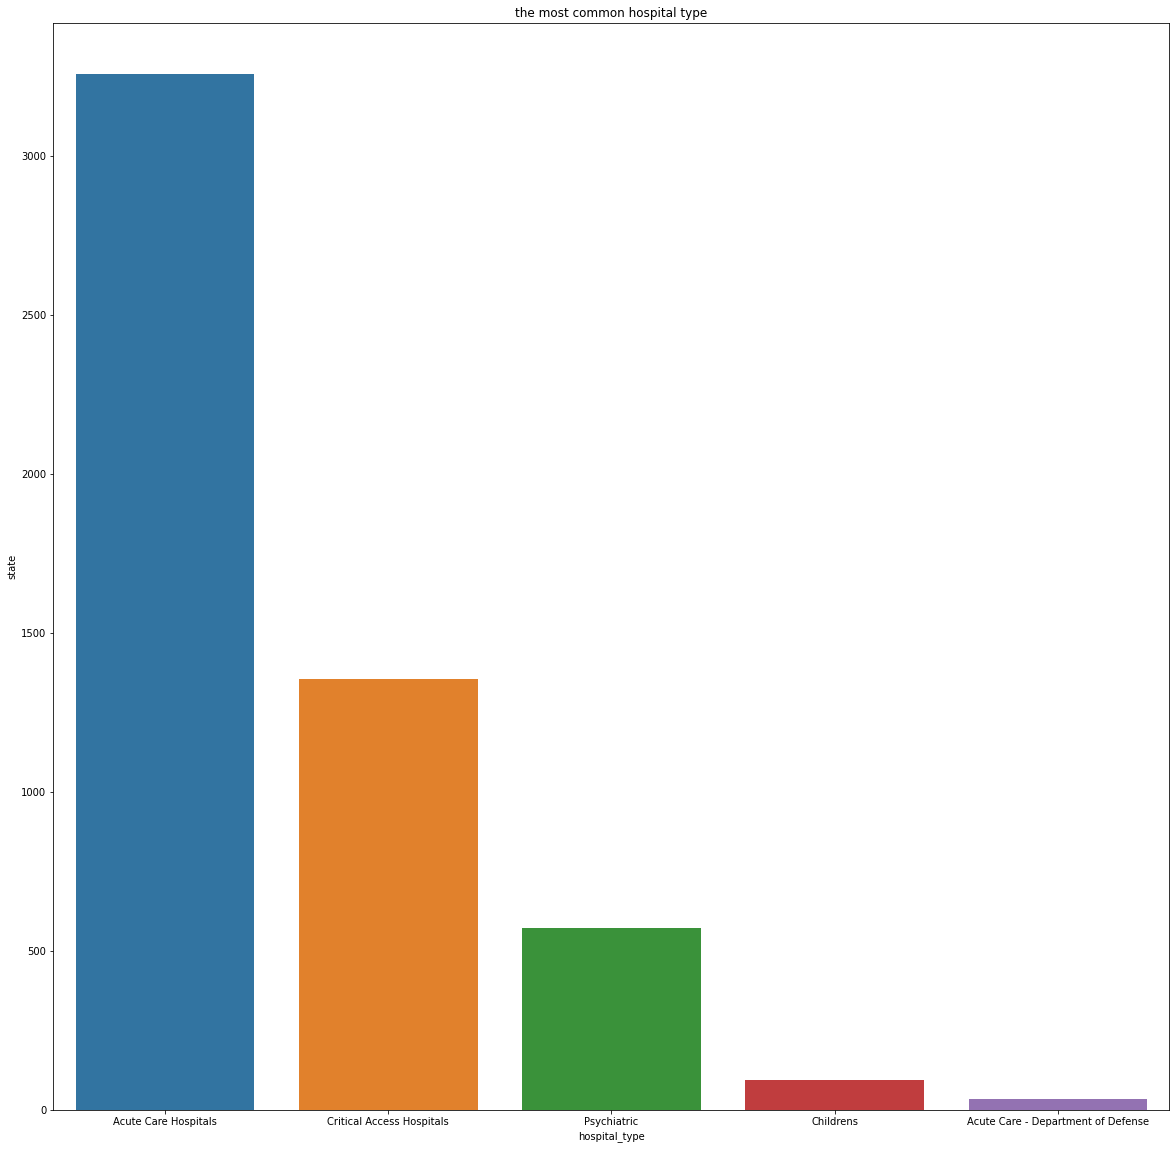

In [64]:
dims = (20,20)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'hospital_type', y= 'state', data = hospitaltype)
ax.set(xlabel = 'hospital_type', ylabel = 'state')
ax.set_title('the most common hospital type')

In [65]:
display(hospitaltype)

,hospital_type,state
0,Acute Care Hospitals,3256
1,Critical Access Hospitals,1355
2,Psychiatric,573
3,Childrens,95
4,Acute Care - Department of Defense,35


# Which city has the most hospitals?

### Chicago, Houston, Columbus



In [66]:
city_total = pd.value_counts(hospital_info['city'])
city_total = pd.DataFrame(city_total)
city_total = city_total.reset_index()

In [67]:
city_total.columns = ['city', 'state']

Text(0.5, 1.0, 'Cities with most hopitals')

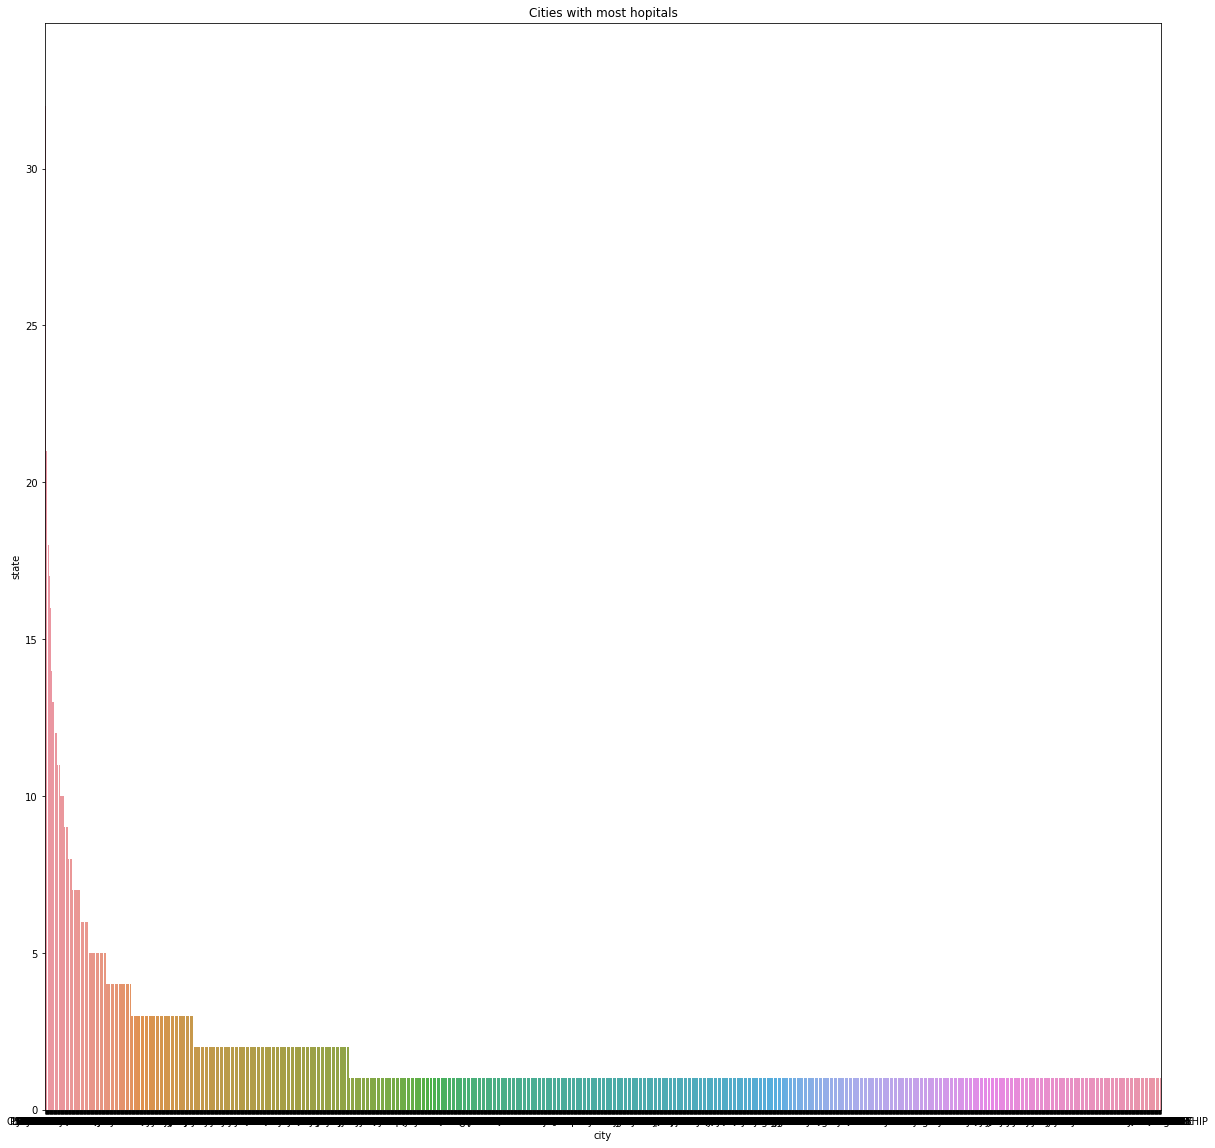

In [68]:
dims = (20,20)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'city', y= 'state', data = city_total)
ax.set(xlabel = 'city', ylabel = 'state')
ax.set_title('Cities with most hopitals')

In [69]:
display(city_total)

,city,state
0,CHICAGO,33
1,HOUSTON,32
2,COLUMBUS,23
3,PHILADELPHIA,22
4,LOS ANGELES,21
...,...,...
3045,FRUITA,1
3046,HANNIBAL,1
3047,STARKVILLE,1
3048,COMMERCE,1


### Dataset merging process starts here

In [102]:

hospital_info['provider_id'] = hospital_info['provider_id'].astype(str)
outpatient2015['provider_id'] = outpatient2015['provider_id'].astype(str)
inpatient2015['provider_id'] = inpatient2015['provider_id'].astype(str)


In [73]:
merged_opatient = outpatient2015.merge(hospital_info, how = 'left', left_on = 'provider_id', right_on = 'provider_id')

In [103]:
merged_opatient

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,hospital_referral_region,outpatient_services,average_estimated_submitted_charges,average_total_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0015 - Level II Debridement & Destruction,AZ - Mesa,1104,419.819583,135.943904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0020 - Level II Excision/ Biopsy,AZ - Mesa,65,10987.446154,823.126000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,AZ - Mesa,23,1858.956522,336.996087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0206 - Level II Nerve Injections,AZ - Mesa,25,4367.840000,338.668800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0265 - Level I Diagnostic and Screening Ultras...,AZ - Mesa,112,669.758929,92.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0631 - Level 1 Examinations & Related Services,CA - Palm Springs/Rancho Mirage,1254,89.869968,56.530303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32528,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0632 - Level 2 Examinations & Related Services,CA - Palm Springs/Rancho Mirage,102,182.108039,119.803922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32529,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0634 - Hospital Clinic Visits,CA - Palm Springs/Rancho Mirage,192140,239.135641,112.518926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32530,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0690 - Level I Electronic Analysis of Devices,CA - Palm Springs/Rancho Mirage,6827,110.422001,40.398146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merged inpatient/hospital

In [87]:
merged_ipatient = inpatient2015.merge(hospital_info, how = 'left', left_on = 'provider_id', right_on = 'provider_id')

In [88]:
merged_ipatient

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,AZ - Mesa,20,175383.60,27159.75,26162.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,038 - EXTRACRANIAL PROCEDURES W CC,AZ - Mesa,11,81730.09,11027.64,10119.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ - Mesa,32,66486.31,7689.63,6671.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,AZ - Mesa,13,39484.54,6884.23,5928.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,AZ - Mesa,68,67407.46,11863.51,10729.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201871,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,919 - COMPLICATIONS OF TREATMENT W MCC,CA - Palm Springs/Rancho Mirage,13,70858.77,12200.92,11455.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201872,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,920 - COMPLICATIONS OF TREATMENT W CC,CA - Palm Springs/Rancho Mirage,14,59682.00,7195.71,6197.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201873,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,948 - SIGNS & SYMPTOMS W/O MCC,CA - Palm Springs/Rancho Mirage,29,45408.93,5100.45,3876.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201874,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,CA - Palm Springs/Rancho Mirage,14,249773.57,66692.00,25490.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SBU and nonSBU data of Hospitalinfo/outpatient merged clean dataset

In [112]:
submerge_outpt = merged_opatient[merged_opatient['provider_id'] == '330393']
submerge_outpt

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,hospital_referral_region,outpatient_services,average_estimated_submitted_charges,average_total_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
32321,330393,University Hospital ( Stony Brook ),Health Sciences Center Suny,Stony Brook,NY,11794,0020 - Level II Excision/ Biopsy,NY - East Long Island,20,4639.925500,948.683000,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
32322,330393,University Hospital ( Stony Brook ),Health Sciences Center Suny,Stony Brook,NY,11794,0074 - Level IV Endoscopy Upper Airway,NY - East Long Island,11,8645.619091,2307.210000,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
32323,330393,University Hospital ( Stony Brook ),Health Sciences Center Suny,Stony Brook,NY,11794,0203 - Level IV Nerve Injections,NY - East Long Island,28,2098.512143,1325.641429,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
32324,330393,University Hospital ( Stony Brook ),Health Sciences Center Suny,Stony Brook,NY,11794,0204 - Level I Nerve Injections,NY - East Long Island,40,1905.025000,232.338250,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
32325,330393,University Hospital ( Stony Brook ),Health Sciences Center Suny,Stony Brook,NY,11794,0207 - Level III Nerve Injections,NY - East Long Island,202,2300.521485,697.655149,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
32326,330393,University Hospital ( Stony Brook ),Health Sciences Center Suny,Stony Brook,NY,11794,026

In [113]:
nonsubmerge_outpt = merged_opatient[merged_opatient['provider_id']!='330393']


In [114]:
nonsubmerge_outpt

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,hospital_referral_region,outpatient_services,average_estimated_submitted_charges,average_total_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0015 - Level II Debridement & Destruction,AZ - Mesa,1104,419.819583,135.943904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0020 - Level II Excision/ Biopsy,AZ - Mesa,65,10987.446154,823.126000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,AZ - Mesa,23,1858.956522,336.996087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0206 - Level II Nerve Injections,AZ - Mesa,25,4367.840000,338.668800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30036,Chandler Regional Medical Center,1955 West Frye Road,Chandler,AZ,85224,0265 - Level I Diagnostic and Screening Ultras...,AZ - Mesa,112,669.758929,92.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0631 - Level 1 Examinations & Related Services,CA - Palm Springs/Rancho Mirage,1254,89.869968,56.530303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32528,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0632 - Level 2 Examinations & Related Services,CA - Palm Springs/Rancho Mirage,102,182.108039,119.803922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32529,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0634 - Hospital Clinic Visits,CA - Palm Springs/Rancho Mirage,192140,239.135641,112.518926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32530,50573,Eisenhower Medical Center,39-000 Bob Hope Drive,Rancho Mirage,CA,92270,0690 - Level I Electronic Analysis of Devices,CA - Palm Springs/Rancho Mirage,6827,110.422001,40.398146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SBU and nonSBU data of Hospitalinfo/inpatient merged clean dataset

In [115]:
submerge_inpt = merged_ipatient[merged_ipatient['provider_id'] == '330393']
submerge_inpt

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
200462,330393,UNIVERSITY HOSPITAL ( STONY BROOK ),HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,NY - East Long Island,40,763781.83,216636.88,172514.88,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
200463,330393,UNIVERSITY HOSPITAL ( STONY BROOK ),HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794,"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUT...",NY - East Long Island,23,493547.74,132951.87,108173.04,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
200464,330393,UNIVERSITY HOSPITAL ( STONY BROOK ),HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794,023 - CRANIO W MAJOR DEV IMPL/ACUTE COMPLEX CN...,NY - East Long Island,17,280725.53,69981.35,62159.71,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
200465,330393,UNIVERSITY HOSPITAL ( STONY BROOK ),HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,NY - East Long Island,52,162409.73,46304.58,37223.42,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,NaN
200466,330393,UNIVERSITY HOSPITAL ( STONY BROOK ),HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794,026 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,NY - East Long Island,20,102755.30,29697.00,26191.15,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794.0,SUFFOLK,(631) 444-4000,Acute Care Hospitals,Government - State,True,True,4,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national aver

In [117]:
nonsubmerge_inpt = merged_ipatient[merged_ipatient['provider_id'] != '330393']
nonsubmerge_inpt

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,AZ - Mesa,20,175383.60,27159.75,26162.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,038 - EXTRACRANIAL PROCEDURES W CC,AZ - Mesa,11,81730.09,11027.64,10119.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ - Mesa,32,66486.31,7689.63,6671.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,AZ - Mesa,13,39484.54,6884.23,5928.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,AZ - Mesa,68,67407.46,11863.51,10729.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201871,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,919 - COMPLICATIONS OF TREATMENT W MCC,CA - Palm Springs/Rancho Mirage,13,70858.77,12200.92,11455.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201872,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,920 - COMPLICATIONS OF TREATMENT W CC,CA - Palm Springs/Rancho Mirage,14,59682.00,7195.71,6197.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201873,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,948 - SIGNS & SYMPTOMS W/O MCC,CA - Palm Springs/Rancho Mirage,29,45408.93,5100.45,3876.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201874,50573,EISENHOWER MEDICAL CENTER,39-000 BOB HOPE DRIVE,RANCHO MIRAGE,CA,92270,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,CA - Palm Springs/Rancho Mirage,14,249773.57,66692.00,25490.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##SBU question1.
### Stony brook most expensive inpatient DRG?
#Answer:
### 003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R. ($216636.88) is the most inpatient expensive dug	

In [118]:
SBU_ipatient_DRG_pivot = submerge_inpt.pivot_table(index=['provider_id','drg_definition'],values=['average_total_payments'])

In [119]:
SBU_ipatient_DRG_pivot_desc = SBU_ipatient_DRG_pivot.sort_values(['average_total_payments'], ascending=False)

In [120]:
SBU_ipatient_DRG_pivot_desc

average_total_payments
provider_id drg_definition                                                            
330393      003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FAC...               216636.88
            004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH...               132951.87
            834 - ACUTE LEUKEMIA W/O MAJOR O.R. PROCEDURE W...                93531.45
            216 - CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PR...                92679.84
            266 - ENDOVASCULAR CARDIAC VALVE REPLACEMENT W MCC                88382.63
...                                                                                ...
            639 - DIABETES W/O CC/MCC                                          7241.82
            316 - OTHER CIRCULATORY SYSTEM DIAGNOSES W/O CC...                 7095.20
            313 - CHEST PAIN                                                   7086.60
            684 - RENAL FAILURE W/O CC/MCC                                     6914.36
            310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS...                 6796.27

[225 rows x 1 columns]

# SBU question 2
## SBU most expensive outpatient drug?
#Answer:
### 0074 - Level IV Endoscopy Upper Airway is the most SBU outpatient APC ($2307.21)

In [121]:
SBU_ipatient_DRUG_pivot = submerge_outpt.pivot_table(index=['provider_id','apc'],values=['average_total_payments'])

In [122]:
SBU_ipatient_DRUG_pivot_desc = SBU_ipatient_DRUG_pivot.sort_values(['average_total_payments'], ascending=False)

In [123]:
SBU_ipatient_DRUG_pivot_desc

average_total_payments
provider_id apc                                                                       
330393      0074 - Level IV Endoscopy Upper Airway                         2307.210000
            0203 - Level IV Nerve Injections                               1325.641429
            0377 - Level II Cardiac Imaging                                1300.672967
            0020 - Level II Excision/ Biopsy                                948.683000
            0207 - Level III Nerve Injections                               697.655149
            0270 - Level II Echocardiogram Without Contrast                 629.345854
            0269 - Level I Echocardiogram Without Contrast                  478.893941
            0369 - Level II Pulmonary Tests                                 271.883099
            0204 - Level I Nerve Injections                                 232.338250
            0267 - Level III Diagnostic and Screening Ultra...              211.974291
            0634 - Hospital Clinic Visits                                   110.068035
            0265 - Level I Diagnostic and Screening Ultrasound              103.004928
            0690 - Level I Electronic Analysis of Devices                    38.450476

#outpatient data of New York state hospitals except SBU

In [127]:
NY_nonsubmerge_outpt = nonsubmerge_outpt[nonsubmerge_outpt['provider_state'] == 'NY']

In [128]:
NY_nonsubmerge_outpt

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,hospital_referral_region,outpatient_services,average_estimated_submitted_charges,average_total_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
321,330239,Woman's Christian Association,207 Foote Avenue,Jamestown,NY,14701,0019 - Level I Excision/ Biopsy,PA - Erie,14,1106.793571,332.560000,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
322,330239,Woman's Christian Association,207 Foote Avenue,Jamestown,NY,14701,0020 - Level II Excision/ Biopsy,PA - Erie,34,1259.209118,724.657941,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
323,330239,Woman's Christian Association,207 Foote Avenue,Jamestown,NY,14701,0204 - Level I Nerve Injections,PA - Erie,30,444.413667,175.570333,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
324,330239,Woman's Christian Association,207 Foote Avenue,Jamestown,NY,14701,0207 - Level III Nerve Injections,PA - Erie,196,850.306990,469.910204,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
325,330239,Woman's Christian Association,207 Foote Avenue,Jamestown,NY,14701,0265 - Level I Diagnostic and Screening Ultras...,PA - Erie,166,264.476867,78.395542,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32344,330401,St Catherine Of Siena Hospital,50 Rout

#inpatient data of New York state hospitals except SBU

In [129]:
NY_nonsubmerge_inpt = nonsubmerge_inpt[nonsubmerge_inpt['provider_state'] == 'NY']

In [130]:
NY_nonsubmerge_inpt

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
2077,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,069 - TRANSIENT ISCHEMIA,PA - Erie,13,8123.69,4617.69,3655.23,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2078,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,101 - SEIZURES W/O MCC,PA - Erie,11,7823.45,4938.36,3808.91,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2079,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC,PA - Erie,17,13790.82,8072.88,7273.12,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2080,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,PA - Erie,93,13978.65,7398.74,6528.16,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2081,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,PA - Erie,16,12470.13,6968.06,6107.31,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Cleaning New York state hospitals datasets (removing null values) except SBU

# Below code clean the NY state inpatient table by removing all the null values

In [131]:
NY_nonsubmerge_inpt_clean = NY_nonsubmerge_inpt[~NY_nonsubmerge_inpt.isnull()]

In [132]:
NY_nonsubmerge_inpt_clean

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating,hospital_overall_rating_footnote,mortality_national_comparison,mortality_national_comparison_footnote,safety_of_care_national_comparison,safety_of_care_national_comparison_footnote,readmission_national_comparison,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
2077,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,069 - TRANSIENT ISCHEMIA,PA - Erie,13,8123.69,4617.69,3655.23,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2078,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,101 - SEIZURES W/O MCC,PA - Erie,11,7823.45,4938.36,3808.91,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2079,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC,PA - Erie,17,13790.82,8072.88,7273.12,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2080,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,PA - Erie,93,13978.65,7398.74,6528.16,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
2081,330239,WOMAN'S CHRISTIAN ASSOCIATION,207 FOOTE AVENUE,JAMESTOWN,NY,14701,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,PA - Erie,16,12470.13,6968.06,6107.31,UPMC CHAUTAUQUA AT WCA,207 FOOTE AVENUE,JAMESTOWN,NY,14701.0,CHAUTAUQUA,(716) 487-0141,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,NaN,Same as the national average,NaN,Above the national average,NaN,Above the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,Below the national average,NaN,POINT (-79.23295 42.091237)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [3]:
profile = ProfileReport(hospital_info, title="Hospital2015-Info")

In [35]:
profile

In [5]:
profile1 = ProfileReport(outpatient2015, title="Outpatient2015-Info")

In [37]:
profile1

In [38]:
profile2 = ProfileReport(inpatient2015, title="inpatient2015-Info")

In [39]:
profile2